# Pymaceuticals Inc.
---

### Analysis

From the analysis, the following insights can be derived:
1. A reduction in tumor volume in Capomulin treatment: The line plot for a single mouse treated with Capomulin shows a general downward trend in tumor volume over time, suggesting that Capomulin may be effective in reducing tumor size in individual mice.

2. A positive correlation (0.84) between mouse weight and the average observed tumor volume for mice treated with the Capomulin regimen, indicating that as the weight of the mouse increases, so does the tumor volume.

3. In the Infubinol treatment, there are potential outliers in tumor volume data, indicating that a few mice exhibited tumor volumes significantly higher or lower than the rest. This variability, as shown over time in clinical settings, is expected as subjects typically respond differently to treatments, though it usually warrants further research. Similarly, more research is needed to fully establish the variability experienced under Infubinol treatment.

4. Capomulin and Ramicane are more effective in Tumor volume reduction as compared to Infubinol and Ceftamin. As depicted by their boxplots and mean tumor volumes, Capomulin's and Ramicane's boxplots cluster towards lower values and have lower summary statistics values (mean, median, variance, standard deviation, and Standard Error of the Mean) as compared to Infubinol and Ceftamin which have higher values. This speaks to their efficacy in treatments based on the provided data.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].nunique()
mice_count

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset = ['Mouse ID','Timepoint'], keep = False)]['Mouse ID'].unique()

#displaying the duplicated mice records
duplicate_mice

array(['g989'], dtype=object)

In [13]:
# Getting all the data for the duplicate mouse ID.
duplicated_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]

#Displaying the results
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice)]

#Displaying the cleaned dataframe
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = cleaned_data['Mouse ID'].nunique()
new_mice_count

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#Grouping by drug regimen:
grouped_data = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Calculating the statistics
summary_stats = grouped_data.agg(
    Mean_Tumor_Volume = 'mean',
    Median_Tumor_Volume = 'median',
    Tumor_Volume_Variance = 'var',
    Tumor_Volume_Std_Dev = 'std',
    Tumor_Volume_Std_Err = lambda x: st.sem(x)
).reset_index()

#Renaming the columns to match the desired output:
summary_stats = summary_stats.rename(columns={
    'Mean_Tumor_Volume': 'Mean Tumor Volume',
    'Median_Tumor_Volume': 'Median Tumor Volume',
    'Tumor_Volume_Variance': 'Tumor Volume Variance',
    'Tumor_Volume_Std_Dev': 'Tumor Volume Std. Dev.',
    'Tumor_Volume_Std_Err': 'Tumor Volume Std. Err.'
})

# Setting Drug Regimen as the index 
summary_stats.set_index('Drug Regimen', inplace=True)

#Displaying the summarized statistics
summary_stats
    

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean = 'mean',
    median = 'median',
    var = 'var',
    std = 'std',
    sem = lambda x: st.sem(x)
)

#Displaying the DataFrame
advanced_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

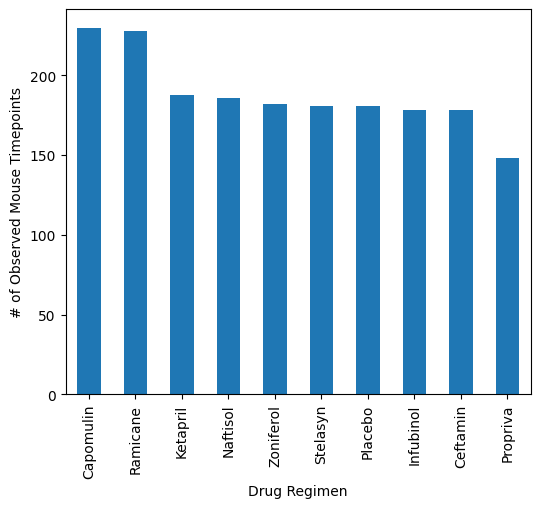

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt

#Counting the number of rows for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

#Generating the bar plot:
drug_regimen_counts.plot(kind = 'bar', figsize = (6,5))

#Setting the x and y axis labels:
plt.xlabel( 'Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Displaying the bar plot
plt.show()

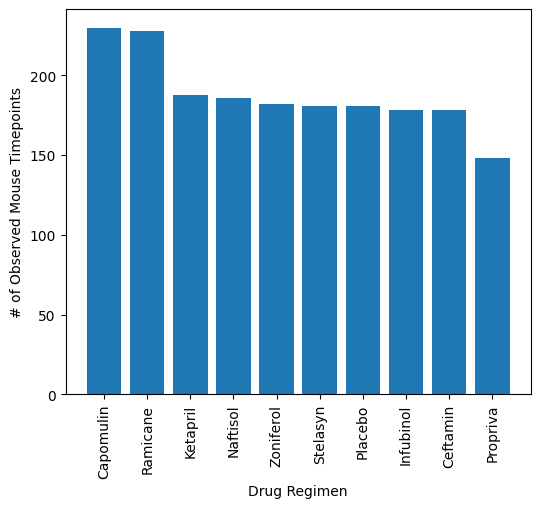

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

#Counting the number of rows for each drug regimen:
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

#Extracting the drug regiments and their counts:
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

#Generating a bar plot using pyplot:
plt.figure(figsize=(6,5))
plt.bar(regimens, counts)

#Setting the x and y axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Rotating the x-axis labels to match the output
plt.xticks(rotation = 90)

#Displaying the bar plot:
plt.show()

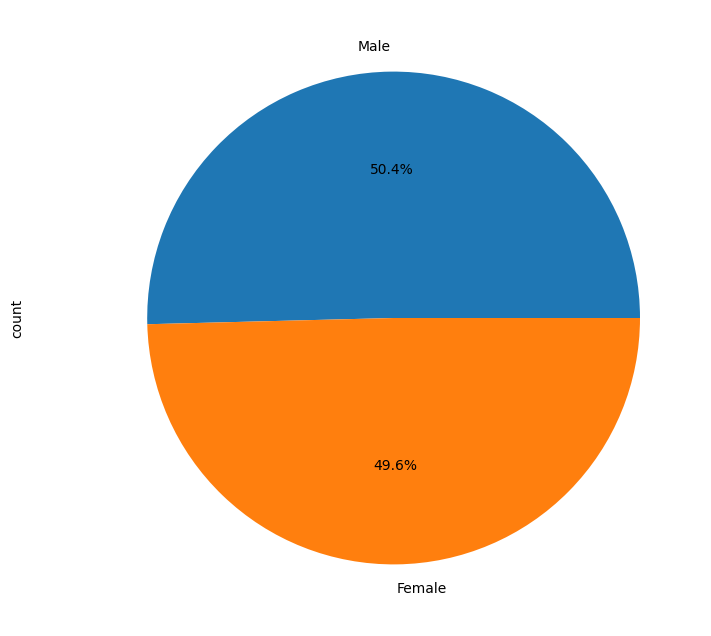

In [40]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt

#Extracting gender of the unique mice from the cleaned data
unique_mice = cleaned_data[['Mouse ID','Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

#Preparing the data for the pie chart
labels = gender_counts.index
sizes = gender_counts.values
#colors=

# Generating the pie chart using Pyplot
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

#Adding a title to the pie chart
plt.text(-1.5, 0, 'count', verticalalignment = 'center', rotation = 'vertical', horizontalalignment = 'right')

#Displaying the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [59]:
# Filtering for the mentioned regimens
mentioned_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = combined_data[combined_data['Drug Regimen'].isin(mentioned_regimens)]

# Getting the last (greatest) timepoint for each mouse in the filtered data
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging this group df with combined_data to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'])

In [60]:
# Putting treatments into a list for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating an empty list to fill with tumor volume data (for plotting)
tumor_volumes = []

# Calculating the IQR and quantitatively determining if there are any potential outliers
for treatment in treatments:
    # Locating the rows which contain mice on each drug and get the tumor volumes
    regimen_data = last_timepoint_data[last_timepoint_data['Drug Regimen'] == treatment]
    
    # Adding tumor volume data to the list
    tumor_volumes.append(regimen_data['Tumor Volume (mm3)'])
    
    # Calculating the IQR
    quartiles = regimen_data['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Determining outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)
    
    # Identifying outliers
    outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) |
                            (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Printing outliers, ensuring format matches desired output
    if not outliers.empty:
        print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)'].to_string(index=True)}")
    else:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


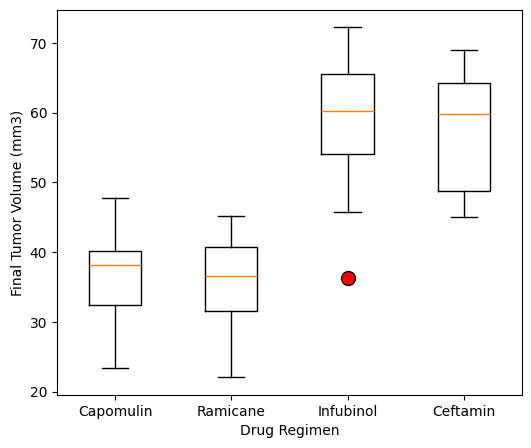

In [61]:
# Create a figure and axis
plt.figure(figsize=(6, 5))

# Defining properties for the outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none')

# Creating a boxplot with customized outlier properties
plt.boxplot(
    [last_timepoint_data[last_timepoint_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments],
    tick_labels=treatments,
    flierprops=flierprops  # Apply the custom outlier properties
)

# Defining the labels
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

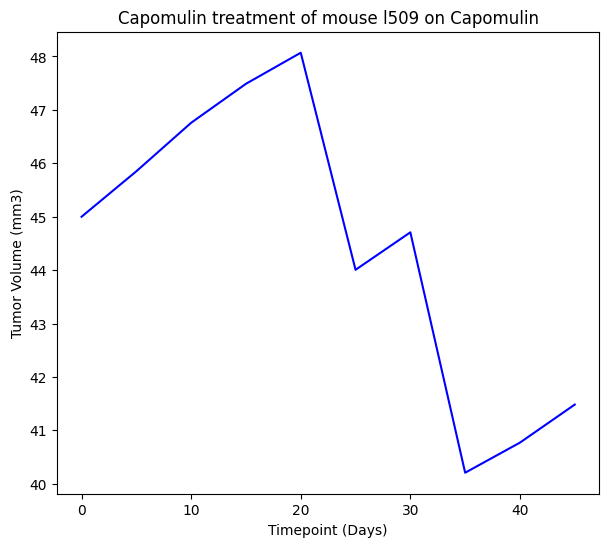

In [70]:
# Filtering data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Selecting a single mouse (for example, Mouse ID 's185')
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Creating a line plot
plt.figure(figsize=(7, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='blue')

# Setting the title and labels
plt.title(f'Capomulin treatment of mouse {mouse_id} on Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Displaying the plot
plt.grid(False)
plt.show()


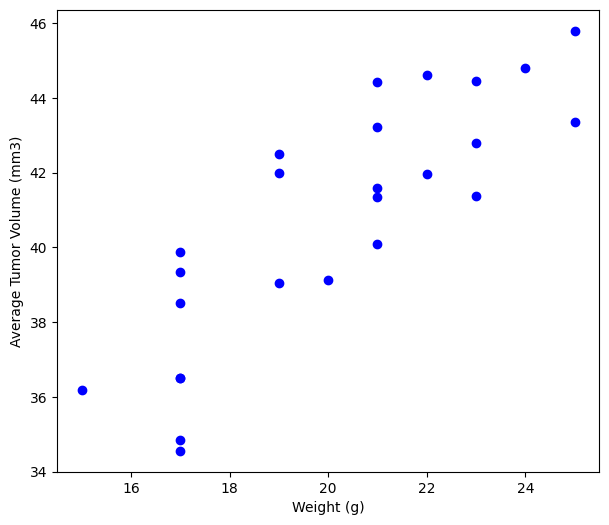

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filtering data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculating average tumor volume for each mouse
avg_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merging with the mouse weight data
# Assuming cleaned_data contains the weight information
mouse_weights = cleaned_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_tumor_volumes = pd.merge(avg_tumor_volumes, mouse_weights, on='Mouse ID')

# Generate scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(avg_tumor_volumes['Weight (g)'], avg_tumor_volumes['Tumor Volume (mm3)'], marker='o', color='blue')

# Set the title and labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(False)
plt.show()


## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is: 0.84


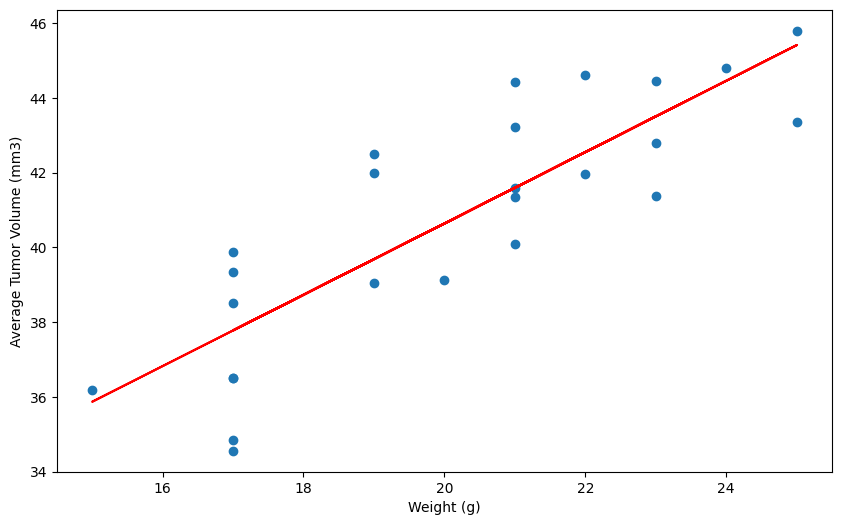

In [79]:
# Calculating the correlation coefficient
correlation_coefficient = avg_tumor_volumes['Weight (g)'].corr(avg_tumor_volumes['Tumor Volume (mm3)'])
print(f"The Correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")

# Performing linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    avg_tumor_volumes['Weight (g)'],
    avg_tumor_volumes['Tumor Volume (mm3)']
)

# Generating scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volumes['Weight (g)'], avg_tumor_volumes['Tumor Volume (mm3)'], marker='o')

# Plotting the linear regression line
regression_line = slope * avg_tumor_volumes['Weight (g)'] + intercept
plt.plot(avg_tumor_volumes['Weight (g)'], regression_line, color='r')

# Setting the labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Displaying the plot
plt.grid(False)
plt.show()
